In [23]:
import matplotlib.pyplot as plt
import numpy as np

from herbie import Herbie_latest, FastHerbie, Herbie
from toolbox import EasyMap, pc, ccrs
import metpy
from metpy.units import units

In [24]:
FH = FastHerbie(["2023-01-14 12:00"], model="hrrr", fxx=range(0,47))
FH.objects

[▌▌Herbie HRRR model sfc product initialized 2023-Jan-14 12:00 UTC F00 ┊ source=aws,
 ▌▌Herbie HRRR model sfc product initialized 2023-Jan-14 12:00 UTC F01 ┊ source=aws,
 ▌▌Herbie HRRR model sfc product initialized 2023-Jan-14 12:00 UTC F02 ┊ source=aws,
 ▌▌Herbie HRRR model sfc product initialized 2023-Jan-14 12:00 UTC F03 ┊ source=aws,
 ▌▌Herbie HRRR model sfc product initialized 2023-Jan-14 12:00 UTC F04 ┊ source=aws,
 ▌▌Herbie HRRR model sfc product initialized 2023-Jan-14 12:00 UTC F05 ┊ source=aws,
 ▌▌Herbie HRRR model sfc product initialized 2023-Jan-14 12:00 UTC F06 ┊ source=aws,
 ▌▌Herbie HRRR model sfc product initialized 2023-Jan-14 12:00 UTC F07 ┊ source=aws,
 ▌▌Herbie HRRR model sfc product initialized 2023-Jan-14 12:00 UTC F08 ┊ source=aws,
 ▌▌Herbie HRRR model sfc product initialized 2023-Jan-14 12:00 UTC F09 ┊ source=aws,
 ▌▌Herbie HRRR model sfc product initialized 2023-Jan-14 12:00 UTC F10 ┊ source=aws,
 ▌▌Herbie HRRR model sfc product initialized 2023-Jan-14 12:00 UT

In [26]:
%%capture 
#Handles warnings..

FH.download("(TMP|RH):2 m") #This needs a good (and cheap) internet connection... ~1m on my connection

In [27]:
%%capture 
#Handles warnings..

ds = FH.xarray("(TMP|RH):2 m", remove_grib=True) #Save space
ds

In [28]:
dsi = ds.herbie.nearest_points([(-87.6298, 41.8781), (-87.9789, 41.7183), (-87.9646831, 41.8031498)], 
                               names=["Chicago", "Argonne", "Barn"])
dsi

/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/metpy/xarray.py:382: UserWarning: More than one time coordinate present for variable "t2m".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/metpy/xarray.py:382: UserWarning: More than one time coordinate present for variable "r2".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


<xarray.Dataset>
Dimensions:              (step: 47, point: 3)
Coordinates:
    time                 datetime64[ns] 2023-01-14T12:00:00
  * step                 (step) timedelta64[ns] 00:00:00 ... 1 days 22:00:00
    heightAboveGround    float64 2.0
    latitude             (point) float64 41.88 41.71 41.79
    longitude            (point) float64 272.4 272.0 272.0
    valid_time           (step) datetime64[ns] 2023-01-14T12:00:00 ... 2023-0...
    metpy_crs            object Projection: lambert_conformal_conic
    y                    (point) float64 4.197e+05 3.987e+05 4.077e+05
    x                    (point) float64 8.185e+05 7.915e+05 7.915e+05
  * point                (point) <U7 'Chicago' 'Argonne' 'Barn'
Data variables:
    t2m                  (point, step) float32 270.2 269.6 269.5 ... 274.1 274.5
    r2                   (point, step) float32 72.5 77.1 81.7 ... 85.4 85.3 84.9
    gribfile_projection  (point) object None None None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    searchString:            (TMP|RH):2 m

In [29]:
dp = metpy.calc.dewpoint_from_relative_humidity(dsi.t2m * units.kelvin, dsi.r2 * units.percent)
dsi['dp'] = dp

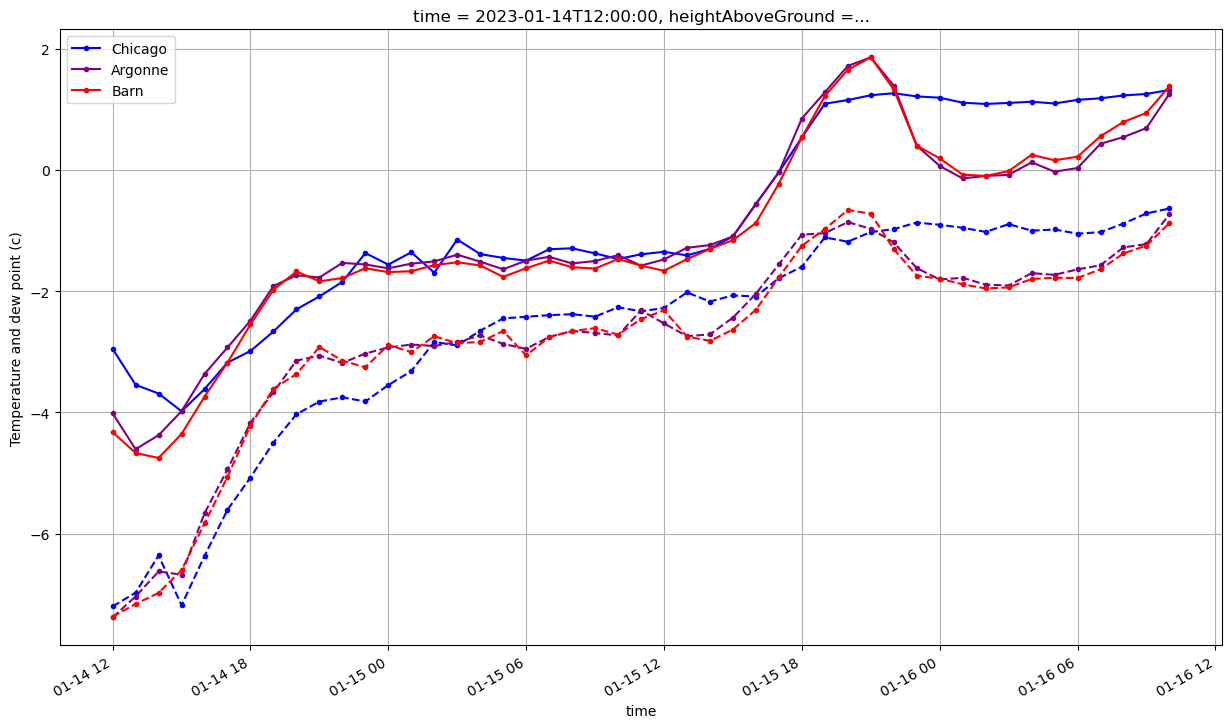

In [34]:
plt.figure(figsize=[15,8])
(dsi.t2m - 273.15).isel(point=0).plot(color='blue', x="valid_time", marker=".", label=dsi.point[0].values)
(dsi.t2m - 273.15).isel(point=1).plot(color='purple', x="valid_time", marker=".", label=dsi.point[1].values)
(dsi.t2m - 273.15).isel(point=2).plot(color='red', x="valid_time", marker=".", label=dsi.point[2].values)

dsi.dp.isel(point=0).plot(color='blue', x="valid_time", marker=".", linestyle='dashed')
dsi.dp.isel(point=1).plot(color='purple', x="valid_time", marker=".", linestyle='dashed')
dsi.dp.isel(point=2).plot(color='red', x="valid_time", marker=".", linestyle='dashed')

plt.grid()
plt.ylabel('Temperature and dew point (celcius)')
plt.xlabel('Time and date (U)')


plt.legend()

In [31]:
metpy.calc.dewpoint_from_relative_humidity?